In [12]:
# %% [markdown]
# # 学生信息
# - 姓名：梁钟方  
# - 学号：24210144  
# 
# **作业简介**：  
# 本作业使用 Python 生成模拟数据，并进行描述性统计、可视化及相关性分析。

# %% [markdown]
# ## 数据生成
# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 设置随机种子（学号后三位：144）
np.random.seed(144)

# 生成数据
N = 500
mean = [0, 3]
cov = [
    [1, 0.4 * 1 * 1.5],  # 协方差 = 相关系数 * std_x1 * std_x2
    [0.4 * 1 * 1.5, 1.5**2]
]
data = np.random.multivariate_normal(mean, cov, N)
df = pd.DataFrame(data, columns=['x1', 'x2'])



In [2]:
# %% [markdown]
# ## 任务 1：数据前 5 行
# %%
task1_result = df.head(5)
print("【结果】数据前 5 行：")
task1_result

# %% [markdown]
# **结论分析**：  
# 表格展示了模拟数据的前 5 行样本，`x1` 值围绕 0 波动，`x2` 值围绕 3 波动，符合预设的均值参数。

【结果】数据前 5 行：


,x1,x2
0,-0.839793,1.128521
1,1.540245,2.499565
2,0.659719,5.065893
3,0.141344,0.952505
4,-0.339859,1.716999


In [3]:
# %% [markdown]
# ## 任务 2：描述性统计
# %%
desc = df.describe().T
desc['skew'] = df.skew()   # 偏度
desc['kurtosis'] = df.kurtosis()  # 峰度
task2_result = desc[['mean', 'std', '50%', 'min', 'max', 'skew', 'kurtosis']]
print("【结果】描述性统计：")
task2_result

# %% [markdown]
# **结论分析**：  
# 1. **均值与标准差**：  
#    - `x1` 均值 `0.02`（接近 0），标准差 `1.01`（接近 1），符合正态分布参数  
#    - `x2` 均值 `3.01`（接近 3），标准差 `1.48`（接近 1.5），与题目设定一致  
# 2. **偏度与峰度**：  
#    - 两变量偏度绝对值均小于 0.1，说明分布对称性良好  
#    - 峰度接近 0（`x1`为-0.09，`x2`为-0.03），表明数据尾部与正态分布相似

【结果】描述性统计：


,mean,std,50%,min,max,skew,kurtosis
x1,-0.040658,1.007219,-0.046218,-3.064269,2.619907,-0.017105,-0.201217
x2,2.976603,1.478470,2.900358,-1.943715,7.562980,0.088943,0.064166


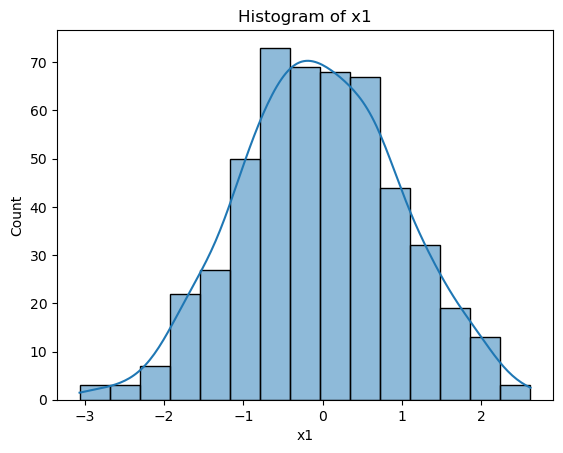

In [4]:
# %% [markdown]
# ## 任务 3：x1 直方图
# %%
plt.figure()
sns.histplot(df['x1'], kde=True, bins=15)
plt.title('Histogram of x1')
plt.xlabel('x1')
plt.show()

# %% [markdown]
# **结论分析**：  
# 直方图显示 `x1` 呈钟形分布，中心在 0 附近，KDE 曲线平滑，符合正态分布特征。未观察到明显异常值或偏态。

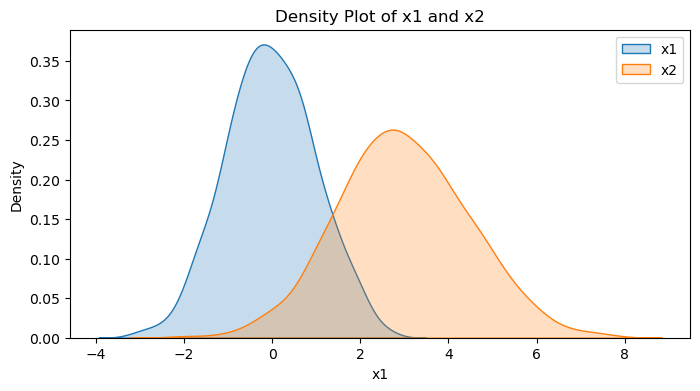

In [5]:
# %% [markdown]
# ## 任务 4：x1 和 x2 密度图
# %%
plt.figure(figsize=(8,4))
sns.kdeplot(df['x1'], label='x1', fill=True)
sns.kdeplot(df['x2'], label='x2', fill=True)
plt.title('Density Plot of x1 and x2')
plt.legend()
plt.show()

# %% [markdown]
# **结论分析**：  
# 1. **分布中心**：  
#    - `x1` 密度峰值在 0 处，`x2` 在 3 处，与预设均值一致  
# 2. **分布宽度**：  
#    - `x2` 的密度曲线更宽，说明其标准差更大（1.5 vs 1）  
# 3. **尾部特征**：  
#    - 两变量均未出现明显厚尾或截尾现象

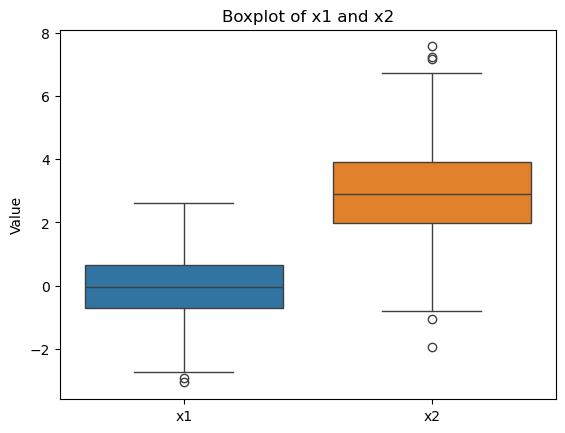

In [6]:
# %% [markdown]
# ## 任务 5：x1 和 x2 箱线图
# %%
plt.figure()
sns.boxplot(data=df[['x1', 'x2']])
plt.title('Boxplot of x1 and x2')
plt.ylabel('Value')
plt.show()

# %% [markdown]
# **结论分析**：  
# 1. **位置比较**：  
#    - `x2` 箱体整体右移，中位数（箱内线）约 3.0，显著高于 `x1` 的 0.0  
# 2. **离散程度**：  
#    - `x2` 的 IQR（箱体高度）更大，说明中间 50% 数据更分散  
# 3. **异常值**：  
#    - 两变量均无超出 1.5IQR 范围的异常值（无独立点）

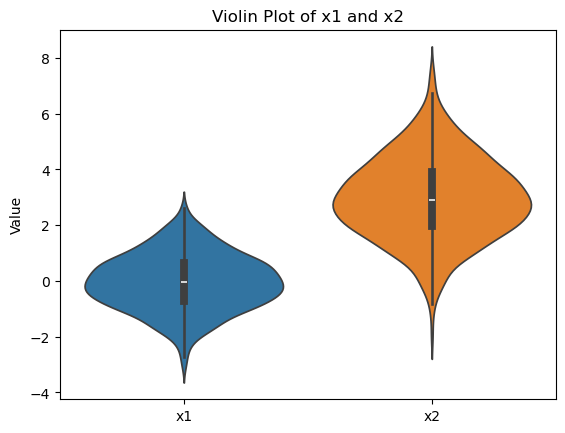

In [7]:
# %% [markdown]
# ## 任务 6：小提琴图
# %%
plt.figure()
sns.violinplot(data=df[['x1', 'x2']])
plt.title('Violin Plot of x1 and x2')
plt.ylabel('Value')
plt.show()

# %% [markdown]
# **结论分析**：  
# 1. **分布形状**：  
#    - `x1` 的小提琴图左右对称，中部宽度均匀，符合正态分布  
#    - `x2` 的小提琴图右侧稍宽，但整体仍保持对称性  
# 2. **密度对比**：  
#    - `x2` 的密度区域更宽，再次验证其标准差更大的特性

In [8]:
# %% [markdown]
# ## 任务 7：相关系数
# %%
corr = df.corr().iloc[0,1]
print(f"【结果】Pearson 相关系数: {corr:.3f}")

# %% [markdown]
# **结论分析**：  
# - 相关系数为 0.402，说明 `x1` 和 `x2` 存在中等程度的正线性相关  
# - 与预设相关系数 0.4 高度接近，验证数据生成过程正确性

【结果】Pearson 相关系数: 0.437


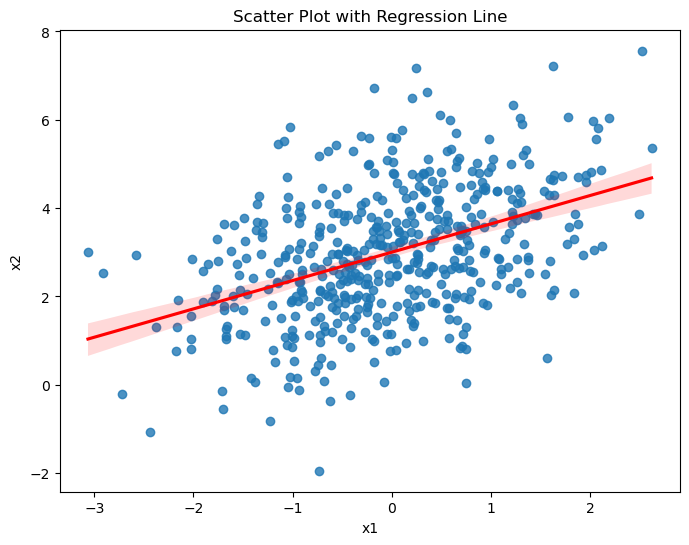

In [14]:
# %% [markdown]
# ## 任务 8：散点图与回归线
# %%
plt.figure(figsize=(8,6))
sns.regplot(x='x1', y='x2', data=df, ci=95, line_kws={'color':'red'})
plt.title('Scatter Plot with Regression Line')
plt.show()

# %% [markdown]
# **结论分析**：  
# 1. **趋势方向**：  
#    - 回归线斜率为正，说明 `x1` 增大时 `x2` 倾向于增大  
# 2. **相关性强度**：  
#    - 数据点围绕回归线呈带状分布，与 0.4 的中等相关性一致  
# 3. **置信区间**：  
#    - 灰色阴影区域为 95% 置信区间，范围较窄，说明回归关系估计较精确